<a href="https://colab.research.google.com/github/Tsinta-Developers/AprendizajeReconocimientodePatrones/blob/main/Tarea4AnalisisdePatrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**T4. Descomposición del error cuadrático en la regresión en sus componentes de sesgo y varianza y para la determinación del modelo óptimo. 13 de Abril.** 

1.   M. Concepción Mota Martínez
2.   Guillermo Francisco García Acosta

1.A partir de la función sen (2 pi x) como base, generar 50 data set de prueba, cada uno con N= 25 puntos.  D(l), l = 1..50.

1.5. Para aproximar h(xn) para n = 1 a 25, genere para cada xn, 50 targets (ver fig 1.16).
     h(xn) = Sum i = 1 hasta 30 de sin(2 pi xn) + Gauss(0,beta)

Para distintos valores de regularización lambda desde no regularización lamba = 0, hasta una regulación muy rígida.
Para cada conjunto de entrenamiento hacer un ajuste con M = 25 (grados de libertad) y con 24 funciones base Gaussianas.( ec. 3.28).

3.Generar un conjunto de prueba con 100 puntos. 

4.Generar una gráfica (similar a la 3.6) con el sesgo cuadrático, la varianza, la suma de la varianza y el sesgo cuadrático y el error en el conjunto de prueba, contra los distintos valores de regularización.

5.Determinar los valores óptimos de la regularización en dos casos:

-La que minimiza la suma de la varianza mas el sesgo cuadrático.

-El que minimiza el error en el conjunto de prueba.

6.Graficar los 2 modelos óptimos junto con el conjunto de prueba y la función sinusoidal base.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
class LinearModel(object):
  """A generic linear regressor. Uses nonlinear basis functions"""
  def __init__(self, basisfunc=None):
    """Instantiate a linear regressor. If you want to use a custom basis function,
    specifity it here. It should accept an array and output an array. The default 
    basis function is the identity function"""
    self.w=np.array([])
    self.basisfunc=basisfunc if basisfunc is not None else self.identity
  
  def identity(self, x):
    #Identify basis function -for linear models in x
    return x
  
  def basismap(self, X):
    #Return X in the new basis (the design matrix)
    Xn=np.zeros((X.shape[0], self.basisfunc(X[0,:]).shape[0]))
    for i, xi in enumerate(X):
      Xn[i,:]=self.basisfunc(xi)
    return Xn
  
  def fit_gd(self, X, y, itrs=100, learning_rate=0.1, regularization=0.1):
    """Fit using iterative gradient descent with least squeres loss
    itrs-iterations of gd
    learning_rate-learning_rate for updates
    regularization-weight decay. Greated values->more regularization"""
        
    #First get a new basis by using our basis func
    Xn=self.basismap(X)
    
    #initial weights
    self.w=np.random.unifom(-0.1, 0.1, (Xn.shape[1],1))
        
    #now optimize in this space, using gradient descent
    print('Initial loss:', self.loss(X,y))
        
    for i in range(itrs):
      grad=self.grad(Xn, y, regularization)
      self.w=self.w-learning_rate*grad
        
    print('Final loss:', self.loss(X,y))

  def grad(self, X, y, reg):
    """Returns the gradient of loss function with respect to the weights.
    Used in gradient descent training"""
    return -np.mean((y-np.dot(X, self.w))*X, axis=0).reshape(self.w.shape)+reg*self.w
    
  def fit_normal_eqns(self, X, y, reg=1e-5):
    """Solves for the weights using the normal equation"""
    Xn=self.basismap(X)
    self.w=np.dot(np.dot(np.linalg.inv(np.eye(Xn.shape[1])*reg+np.dot(Xn.T, Xn)), Xn.T), y)
    
  def predict(self, X):
    """"Makes predictions on a matrix of (observations x features)"""
    Xn=self.basismap(X)
    return np.dot(Xn, self.w)
    
  def loss(self, X, y):
    #Assumes that X is the data matrix (not the design matrix)
    yh=self.predict(X)
    return np.mean((yh-y)**2)

In [ ]:
def gaussian_basis(x):
  return np.hstack(tuple(np.exp(-((x-mu)**2)/(2*(0.1**2)))) for mu in np.arange(0,1,1/25))

In [ ]:
def func(x): return np.sin(2*np.pi*x)

In [ ]:
def plot_truth(x, y, label='Truth'):
    plt.plot(x, y, 'k--', label=label)

In [ ]:
def calculate_estimator_bias_squared(pred_test,hxn):
    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((pred_test - hxn) ** 2)


In [ ]:
def calculate_estimator_variance(pred_test, yx):
  return (pred_test-yx)**2

In [ ]:
def polynomial_basis_function(x):
    M = 25
    Ms = range(M + 1)
    return x ** Ms[1:]

In [ ]:
#funcion sinusoidal
xs=np.linspace(0,1,num=100)
ys=np.sin(2*np.pi*xs)

In [ ]:
np.random.seed(1234)
x_test=np.linspace(0,1,num=100)
y_test=np.sin(2*np.pi*x_test)+0.1*np.random.randn(len(x_test))

In [ ]:
n_tests=50
n_total=25
n_test=100
x=np.zeros((n_tests,n_total))
y=np.zeros((n_tests,n_total))
rng=np.random.RandomState(1234)
for i in range(0,n_tests):
  x[i,:]=rng.uniform(0.,1.,n_total)
  y[i,:]=np.sin(2*np.pi*x[i,:])+np.random.randn(len(x[i,:]))*0.1

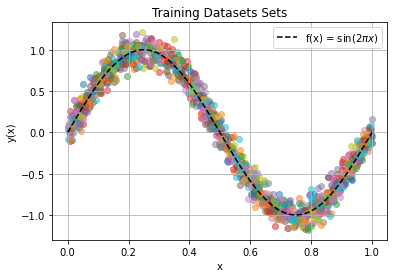

In [ ]:
#Datasets plot
plt.figure()
for j in range(0,n_tests):
  plt.scatter(x[j],y[j],alpha = 0.5)

plot_truth(xs,ys,label='f(x) = $\sin(2\pi x)$')  
plt.grid()
plt.legend()
plt.title('Training Datasets Sets')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()


Modelo Polinomios

In [ ]:
regu=np.arange(-3,3,0.1)
len(regu)

60

In [ ]:
reguP=np.arange(-35,-20,0.1)
len(reguP)

150

In [ ]:
ajustesP=np.zeros((n_tests, n_test))
ajustes_rP=np.zeros((len(reguP),n_tests,n_test)) #matriz para cada conjunto de ajustes con respecto a cada valor de lambda
for r in range(len(reguP)):
  for k in range(0,n_tests):
    model=LinearModel(basisfunc=polynomial_basis_function)
    model.fit_normal_eqns(x[k].reshape((-1,1)), y[k].reshape((-1,1)), np.exp(reguP[r]))
    yh=model.predict(x_test.reshape((-1,1)))
    ajustesP[k,:]=list(yh) #conjunto de ajustes con r lambda
  ajustes_rP[r,:,:]=ajustesP[k,:]#Matriz con el conjunto de ajustes para cada k lambda
  
# ajustesP=np.zeros((n_tests, n_test))
# for k in range(0,n_tests):
#   model=LinearModel(basisfunc=polynomial_basis_function)
#   model.fit_normal_eqns(x[k].reshape((-1,1)), y[k].reshape((-1,1)), 0.1)
#   yh=model.predict(x_test.reshape((-1,1)))
#   ajustesP[k,:]=list(yh)
#   #ajustes[k,:]=yh.reshape((1,-1))

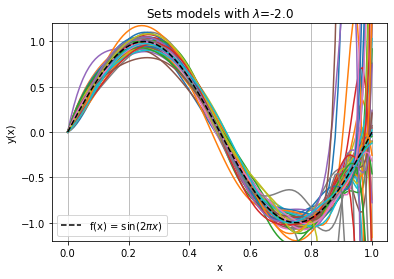

In [ ]:
plt.figure()
for l in range(0,n_tests):
  plt.plot(x_test, ajustesP[l])

plot_truth(xs,ys,label='f(x) = $\sin(2\pi x)$')
plt.legend()
plt.ylim([-1.2,1.2])
plt.title('Sets models with $\lambda$=-2.0')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

Modelo Gaussiano

In [ ]:
ajustes=np.zeros((n_tests, n_test))
ajustes_r=np.zeros((len(regu),n_tests,n_test)) #matriz para cada conjunto de ajustes con respecto a cada valor de lambda
for r in range(len(regu)):
  for k in range(0,n_tests):
    model=LinearModel(basisfunc=gaussian_basis)
    model.fit_normal_eqns(x[k].reshape((-1,1)), y[k].reshape((-1,1)), np.exp(regu[r]))
    yh=model.predict(x_test.reshape((-1,1)))
    ajustes[k,:]=list(yh) #conjunto de ajustes con r lambda
  ajustes_r[r,:,:]=ajustes[k,:]#Matriz con el conjunto de ajustes para cada k lambda
  
#for k in range(0,n_tests):
#  model=LinearModel(basisfunc=gaussian_basis)
#  model.fit_normal_eqns(x[k].reshape((-1,1)), y[k].reshape((-1,1)), np.exp(-2.4))
#  yh=model.predict(x_test.reshape((-1,1)))
#  ajustes[k,:]=list(yh)
  #ajustes[k,:]=yh.reshape((1,-1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


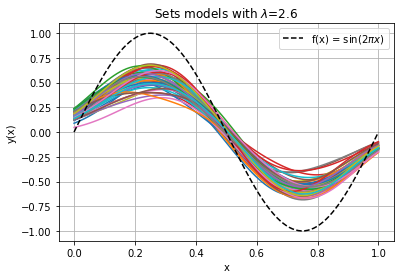

In [ ]:
plt.figure()
for l in range(0,n_tests):
  plt.plot(x_test, ajustes[l])

plot_truth(xs,ys,label='f(x) = $\sin(2\pi x)$')
plt.title('Sets models with $\lambda$=2.6')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

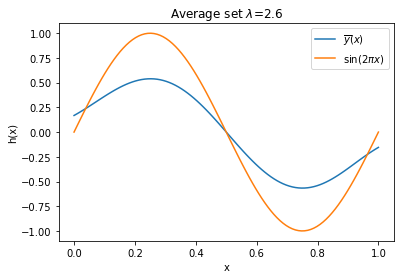

In [ ]:
#Promedio de los ajustes anteriores
maf=ajustes.mean(axis=0)
plt.figure()
plt.plot(x_test,maf, label='$\overline{y}(x)$')
plt.plot(xs,ys, label='$\sin(2\pi x)$')
plt.title('Average set $\lambda$=2.6')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()
plt.show()

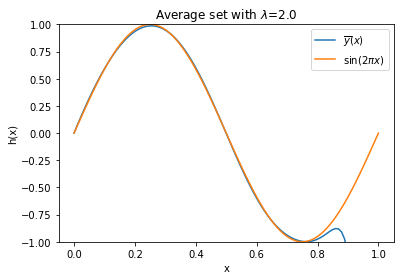

In [ ]:
#Promedio de los ajustes anteriores
mafP=ajustesP.mean(axis=0)
plt.figure()
plt.plot(x_test,mafP, label='$\overline{y}(x)$')
plt.plot(xs,ys, label='$\sin(2\pi x)$')
plt.title('Average set with $\lambda$=2.0')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.ylim([-1,1])
plt.legend()
plt.show()

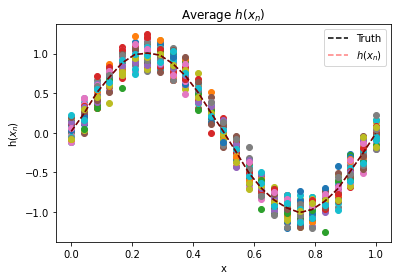

In [ ]:
#Creando h(xn)
hx=np.zeros((n_tests,n_total))
hy=np.zeros((n_tests,n_total))
for x in range(0,n_tests):
  hx[x,:]=np.linspace(0,1,num=25)
  hy[x,:]=np.sin(2*np.pi*hx[x,:])+0.1*np.random.randn(hx[x,:].shape[0])

plt.figure()
for p in range(0,n_tests):
  plt.scatter(hx[p],hy[p])

hx_m=hx.mean(axis=0)
hy_m=hy.mean(axis=0)
plot_truth(hx.mean(axis=0),hy.mean(axis=0))
plt.plot(hx_m,hy_m, 'r--', label='$h(x_n$)', alpha=0.5)
plt.title('Average $h(x_n)$')
plt.xlabel('x')
plt.ylabel('h($x_n$)')
plt.legend()
plt.show()

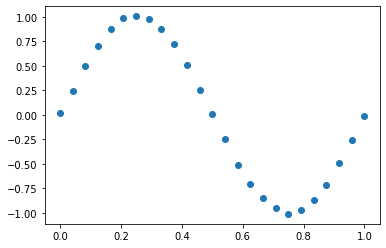

In [ ]:
hx_m=hx.mean(axis=0)
hy_m=hy.mean(axis=0)
plt.scatter(hx_m,hy_m)

In [ ]:
# Bias del modelo gaussiano
bias=0
bias1=[]
for k in range(0,ajustes_r.shape[0]): #para recorrer cada conjunto con respecto a lambda
  for i in range(0,n_total): # para recorrer cada ajuste con respecto al número de datasets de entrenamiento
    for j in range(0, n_tests): # para recorrer cada valor del conjunto de prueba
      bias+=calculate_estimator_bias_squared(ajustes_r[k,j,i],hx_m[i])
      bias=bias/n_total 
  bias1.append(bias)

In [ ]:
# Bias del modelo polinomial
biasP=0
biasP1=[]
for k in range(0,ajustes_rP.shape[0]): #para recorrer cada conjunto con respecto a lambda
  for i in range(0,n_total): # para recorrer cada ajuste con respecto al número de datasets de entrenamiento
    for j in range(0, n_tests): # para recorrer cada valor del conjunto de prueba
      biasP+=calculate_estimator_bias_squared(ajustes_rP[k,j,i],hx_m[i])
      biasP=biasP/n_total 
  biasP1.append(biasP)

In [ ]:
#Varianza del modelo gaussiano
variance=0
variance1=[]
for k in range(0,ajustes_r.shape[0]): #para recorrer cada conjunto con respecto a lambda
  for i in range(0,n_total): # para recorrer cada ajuste con respecto al número de datasets de entrenamiento
    for j in range(0, n_tests): # para recorrer cada valor del conjunto de prueba
      variance+=calculate_estimator_variance(ajustes_r[k,j,i],maf[i]) #calcula la varianza
    variance=variance/n_tests
  variance=variance/n_total
  variance1.append(variance) #guarda cada varianza calculada de cada lambda
#for i in range(0,n_total):
#  for j in range(0,n_tests):
#    variance+=calculate_estimator_variance(ajustes[j,i], maf[i])
#  variance=variance/n_tests
#variance=variance/n_total

In [ ]:
#Varianza del modelo polinomial
varianceP=0
varianceP1=[]
for k in range(0,ajustes_rP.shape[0]): #para recorrer cada conjunto con respecto a lambda
  for i in range(0,n_total): # para recorrer cada ajuste con respecto al número de datasets de entrenamiento
    for j in range(0, n_tests): # para recorrer cada valor del conjunto de prueba
      varianceP+=calculate_estimator_variance(ajustes_rP[k,j,i],mafP[i]) #calcula la varianza
    varianceP=varianceP/n_tests
  varianceP=varianceP/n_total
  varianceP1.append(varianceP) #guarda cada varianza calculada de cada lambda
#for i in range(0,n_total):
#  for j in range(0,n_tests):
#    variance+=calculate_estimator_variance(ajustes[j,i], maf[i])
#  variance=variance/n_tests
#variance=variance/n_total

In [ ]:
#Calcule loss with test dataset
def calculate_loss(yh, y_test):
  return np.mean((yh-y_test)**2)

In [ ]:
#loss with the test set and the average of each set of curves
mloss=[]
for i in range(ajustes_r.shape[0]):
  mloss.append(ajustes_r[i].mean(axis=0))
print(len(mloss),len(mloss[0]))
t_loss=[]
for j in range(len(mloss)):
  t_loss.append(calculate_loss(mloss[j],y_test))

60 100


In [ ]:
#loss with the test set and the average of each set of curves modelo polinomial
mlossP=[]
for i in range(ajustes_rP.shape[0]):
  mlossP.append(ajustes_rP[i].mean(axis=0))
print(len(mlossP),len(mlossP[0]))
t_lossP=[]
for j in range(len(mlossP)):
  t_lossP.append(calculate_loss(mlossP[j],y_test))

150 100


In [ ]:
bv = np.sum([variance1,bias1],axis=0)

In [ ]:
bvP = np.sum([varianceP1,biasP1],axis=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

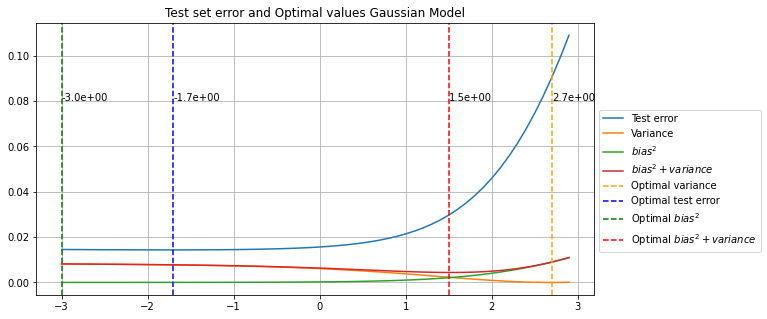

In [ ]:
op=regu[np.argmin(variance1)] # se obtiene el óptimo de la varianza
op1=regu[np.argmin(t_loss)] # óptimo de la pérdida del conjunto de prueba
op2=regu[np.argmin(bias1)]
op3=regu[np.argmin(bv)]
plt.figure(figsize=(10,5))
plt.plot(regu, t_loss, label='Test error') #gráfica de la perdida
plt.plot(regu, variance1, label='Variance') #grafica de la varianza
plt.plot(regu, bias1, label='$bias^2$')
plt.plot(regu, bv,label='$bias^2+variance$')
plt.axvline(x=op, linestyle='--',  color='orange',label='Optimal variance')
plt.axvline(x=op1, linestyle='--', color='b', label='Optimal test error')
plt.axvline(x=op2, linestyle='--', color='g', label='Optimal $bias^2$')
plt.axvline(x=op3, linestyle='--', color='r', label='Optimal $bias^2+variance$')
plt.legend(bbox_to_anchor=(1,0.7))
plt.text(op,.08,'{0:.1e}'.format(op))
plt.text(op1,.08,'{0:.1e}'.format(op1))
plt.text(op2,.08,'{0:.1e}'.format(op2))
plt.text(op3,.08,'{0:.1e}'.format(op3))
plt.title('Test set error and Optimal values Gaussian Model')
plt.grid()
plt.savefig("Error1.png",dpi=300)
files.download("Error1.png")
plt.show()

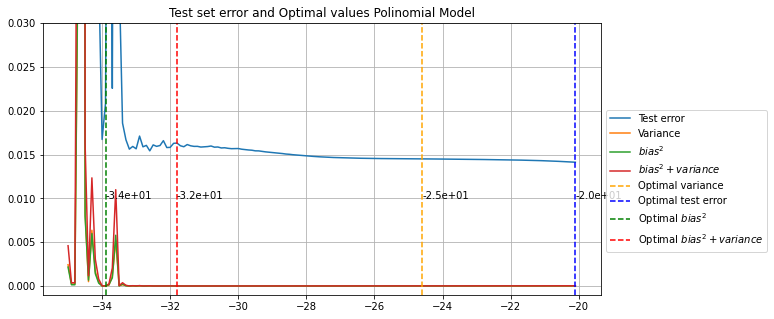

In [ ]:
opP=reguP[np.argmin(varianceP1)] # se obtiene el óptimo de la varianza
op1P=reguP[np.argmin(t_lossP)] # óptimo de la pérdida del conjunto de prueba
op2P=reguP[np.argmin(biasP1)]
op3P=reguP[np.argmin(bvP)]
plt.figure(figsize=(10,5))
plt.plot(reguP, t_lossP, label='Test error') #gráfica de la perdida
plt.plot(reguP, varianceP1, label='Variance') #grafica de la varianza
plt.plot(reguP, biasP1, label='$bias^2$')
plt.plot(reguP, bvP,label='$bias^2+variance$')
plt.axvline(x=opP, linestyle='--',  color='orange',label='Optimal variance')
plt.axvline(x=op1P, linestyle='--', color='b', label='Optimal test error')
plt.axvline(x=op2P, linestyle='--', color='g', label='Optimal $bias^2$')
plt.axvline(x=op3P, linestyle='--', color='r', label='Optimal $bias^2+variance$')
plt.legend(bbox_to_anchor=(1,0.7))
plt.text(opP,.01,'{0:.1e}'.format(opP))
plt.text(op1P,.01,'{0:.1e}'.format(op1P))
plt.text(op2P,.01,'{0:.1e}'.format(op2P))
plt.text(op3P,.01,'{0:.1e}'.format(op3P))
plt.title('Test set error and Optimal values Polinomial Model')
plt.grid()
plt.ylim([-0.001,0.03])
# plt.savefig("Error2.png",dpi=300)
# files.download("Error2.png")
plt.show()

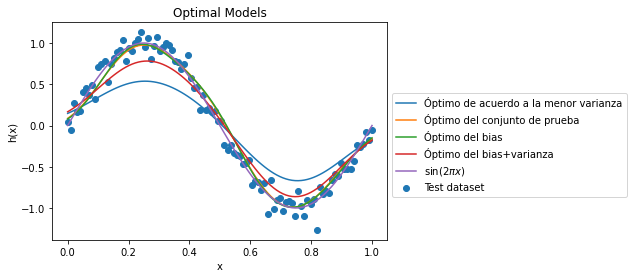

In [ ]:
by=ajustes_r[np.argmin(variance1)] # conjunto de ajustes con el mínimo error de acuerdo a la varianza
by=by.mean(axis=0) # promedio del conjunto de ajustes
ml=ajustes_r[np.argmin(t_loss)] # conjunto de ajustes con el mínimo error de acuerdo al conjunto de prueba
ml=ml.mean(axis=0) # promedio del conjunto de ajustes
bl=ajustes_r[np.argmin(bias1)]
bl = bl.mean(axis=0)
blv=ajustes_r[np.argmin(bv)]
blv = blv.mean(axis=0)
plt.figure()
plt.plot(x_test, by, label='Óptimo de acuerdo a la menor varianza')
plt.plot(x_test, ml, label='Óptimo del conjunto de prueba')
plt.plot(x_test,bl,label='Óptimo del bias')
plt.plot(x_test,blv,label='Óptimo del bias+varianza')
plt.plot(xs,ys, label='$\sin(2\pi x)$')
plt.scatter(x_test, y_test, label='Test dataset')
plt.title('Optimal Models')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend(bbox_to_anchor=(1,0.7))
plt.show()

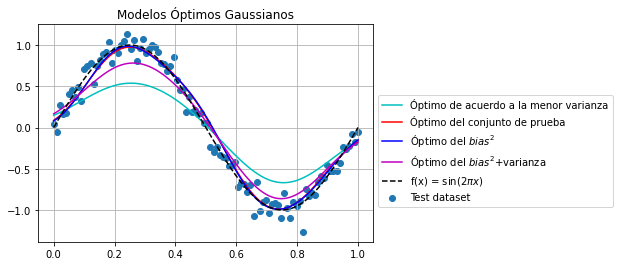

In [ ]:
by=ajustes_r[np.argmin(variance1)] # conjunto de ajustes con el mínimo error de acuerdo a la varianza
by=by.mean(axis=0) # promedio del conjunto de ajustes
ml=ajustes_r[np.argmin(t_loss)] # conjunto de ajustes con el mínimo error de acuerdo al conjunto de prueba
ml=ml.mean(axis=0) # promedio del conjunto de ajustes
bl=ajustes_r[np.argmin(bias1)]
bl = bl.mean(axis=0)
blv=ajustes_r[np.argmin(bv)]
blv = blv.mean(axis=0)

#for i in range(0,n_tests):
#  x[i,:]=rng.uniform(0.,1.,n_total)
#  y[i,:]=np.sin(2*np.pi*x[i,:])+np.random.randn(len(x[i,:]))*0.1
#plt.figure(figsize=(8,5))
#for j in range(0,n_tests):
#  plt.scatter(x[j],y[j],alpha = 0.2)

plt.plot(x_test, by, 'c', label='Óptimo de acuerdo a la menor varianza')
plt.plot(x_test, ml, 'red', label='Óptimo del conjunto de prueba')
plt.plot(x_test,bl,'blue',label='Óptimo del $bias^2$')
plt.plot(x_test,blv,'m',label='Óptimo del $bias^2$+varianza')
plot_truth(xs,ys,label='f(x) = $\sin(2\pi x)$')
plt.scatter(x_test, y_test, label='Test dataset')
plt.legend(bbox_to_anchor=(1,0.7))
plt.title('Modelos Óptimos Gaussianos')
plt.grid()
plt.show()

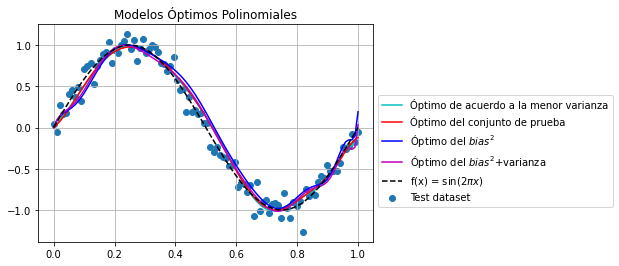

In [ ]:
byP=ajustes_rP[np.argmin(varianceP1)] # conjunto de ajustes con el mínimo error de acuerdo a la varianza
byP=byP.mean(axis=0) # promedio del conjunto de ajustes
mlP=ajustes_rP[np.argmin(t_lossP)] # conjunto de ajustes con el mínimo error de acuerdo al conjunto de prueba
mlP=mlP.mean(axis=0) # promedio del conjunto de ajustes
blP=ajustes_rP[np.argmin(biasP1)]
blP = blP.mean(axis=0)
blvP=ajustes_rP[np.argmin(bvP)]
blvP = blvP.mean(axis=0)

#for i in range(0,n_tests):
#  x[i,:]=rng.uniform(0.,1.,n_total)
#  y[i,:]=np.sin(2*np.pi*x[i,:])+np.random.randn(len(x[i,:]))*0.1
#plt.figure(figsize=(8,5))
#for j in range(0,n_tests):
#  plt.scatter(x[j],y[j],alpha = 0.2)

plt.plot(x_test, byP, 'c', label='Óptimo de acuerdo a la menor varianza')
plt.plot(x_test, mlP, 'red', label='Óptimo del conjunto de prueba')
plt.plot(x_test,blP,'blue',label='Óptimo del $bias^2$')
plt.plot(x_test,blvP,'m',label='Óptimo del $bias^2$+varianza')
plot_truth(xs,ys,label='f(x) = $\sin(2\pi x)$')
plt.scatter(x_test,y_test,label='Test dataset')
plt.legend(bbox_to_anchor=(1,0.7))
plt.title('Modelos Óptimos Polinomiales')
plt.grid()
plt.show()

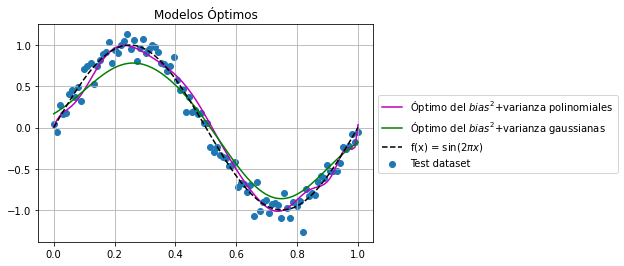

In [ ]:
plt.figure()
plt.plot(x_test,blvP,'m',label='Óptimo del $bias^2$+varianza polinomiales')
plt.plot(x_test,blv,'g',label='Óptimo del $bias^2$+varianza gaussianas')
plot_truth(xs,ys,label='f(x) = $\sin(2\pi x)$')
plt.scatter(x_test,y_test,label='Test dataset')
plt.legend(bbox_to_anchor=(1,0.7))
plt.title('Modelos Óptimos')
plt.grid()
plt.show()